In [2]:
# For using pandas:
import pandas as pd

# For creating charts: 
from matplotlib import pyplot as plt

# for having the graphs show up in the notebook, instead of as a pop up: 
%matplotlib inline

# Quick hack to avoid filling the screen with boring warnings 
pd.options.mode.chained_assignment = None  # default='warn'

### Loading Data

In [4]:
# load the Titanic data into Pandas DataFrame using the .csv file
titanic = pd.read_csv('titanic_data/train.csv')

### Viewing Data

In [5]:
# show the first 5 entries of the data
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
type(titanic)

pandas.core.frame.DataFrame

In [7]:
# see dimensions of the DataFrame, e.g. the matrix
titanic.shape

(891, 12)

In [8]:
# get a short summary of the columns and what data there is in each column
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic.iloc[-1:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [13]:
# see row -1, display columns 0-7, e.g 8 columns
titanic.iloc[-1:, :7]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0


The data has 891 recorded passengers, or 891 rows, and there are 12 known characteristics for each passenger, or 12 columns

### Manipulating Data

In [14]:
# inplace = True - removes the column from the DataFrame itself without creating a copy of it, 
# removing the column and returning the updated copy
# axis = 0 - operate over rows
# axis = 1 - operate over columns
titanic.drop('Name', inplace=True, axis=1)

In [15]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Observing Data

In [16]:
# the survived column is contains binary entries
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

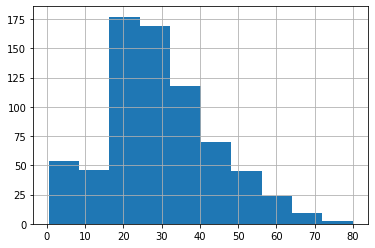

In [19]:
# let's see what was the age of the passengers
titanic.Age.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20b1ba1748>,
      dtype=object)

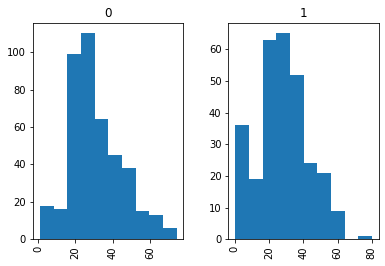

In [20]:
# plot a histogram passing more than 1 value
titanic.hist(column='Age', by='Survived')

In [21]:
# cross table between Embarked and Pclass
pd.crosstab(titanic.Pclass, titanic.Embarked, margins=True)

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [22]:
pd.crosstab(titanic.Pclass, titanic.Embarked).apply(lambda r: r/r.sum(), axis=1)

Embarked,C,Q,S
Pclass,,,
1,0.397196,0.009346,0.593458
2,0.092391,0.016304,0.891304
3,0.134420,0.146640,0.718941


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20b14446a0>,
      dtype=object)

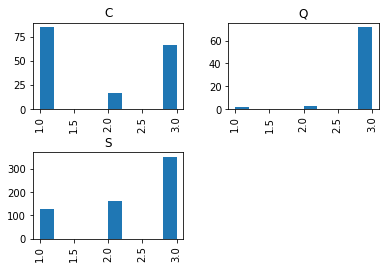

In [23]:
titanic.hist(column='Pclass', by='Embarked')

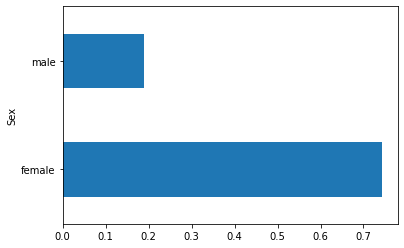

In [24]:
titanic.groupby('Sex').Survived.mean().plot(kind = 'barh')

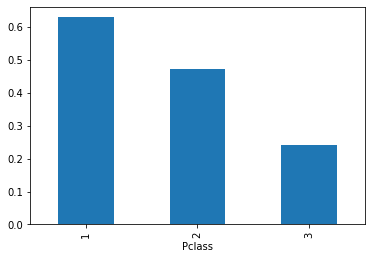

In [26]:
titanic.groupby('Pclass').Survived.mean().plot(kind = 'bar')

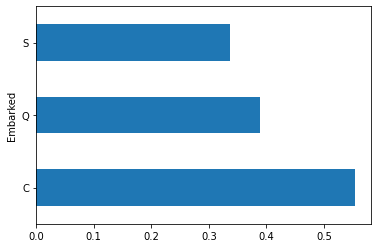

In [27]:
titanic.groupby('Embarked').Survived.mean().plot(kind = 'barh')

#### Kernel Density Estimation - estimates the probability density funtion of a random variable

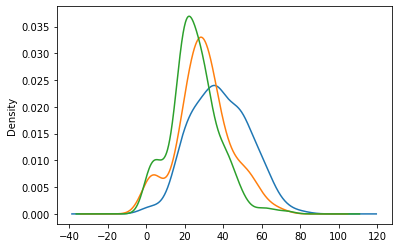

In [28]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')

[]

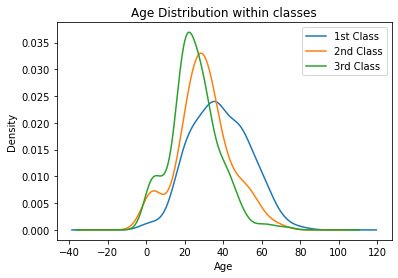

In [29]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')

#################################################
#  The rest is optional, just makes it pretty   #
#################################################

# plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
plt.plot()

### Data Cleaning

Find missing data

In [30]:
titanic.isnull().head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False


In [31]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [32]:
# we do not find Cabin to be very important, so we safely frop it
titanic.drop('Cabin', inplace = True, axis = 1)

In [33]:
# now let's deal with missing Ages
mask = titanic['Age'].isnull()

In [34]:
mask.head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Age, dtype: bool

In [35]:
titanic[mask].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
5,6,3,male,NaN,0,0,330877,8.4583,Q,0
17,18,2,male,NaN,0,0,244373,13.0000,S,1
19,20,3,female,NaN,0,0,2649,7.2250,C,1
26,27,3,male,NaN,0,0,2631,7.2250,C,0
28,29,3,female,NaN,0,0,330959,7.8792,Q,1


In [36]:
titanic.head(6)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.0,1,0,113803,53.1000,S,1
4,5,3,male,35.0,0,0,373450,8.0500,S,0
5,6,3,male,NaN,0,0,330877,8.4583,Q,0


In [37]:
# generates various statistics from the DataFrame
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
titanic.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [39]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Dealing with Missing Data

In [41]:
# find the mean of all passenger ages
mean_age = titanic.Age.mean()
print(mean_age)

29.69911764705882


In [42]:
# fill in all missing data with the mean of that data column
titanic['Age'].fillna(mean_age, inplace = True)

In [43]:
# check if we have missing data now in the Age column
titanic['Age'].isnull().sum()

0

In [44]:
titanic.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [46]:
titanic.shape

(891, 10)

In [47]:
# there is still some missing data in the Embarked column
# default: drop rows, if you want to drop columns, specify axis=1
titanic.dropna(inplace=True)

In [48]:
titanic.shape

(889, 10)

### Masks and Filtering

In [49]:
titanic['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [50]:
# create a mask which shows us all passengers who were older than 25
mask = titanic['Age'] > 25

In [51]:
mask.head(10)

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8     True
9    False
Name: Age, dtype: bool

In [52]:
# let's see full data again, first 5 rows, where Age > 25
titanic[mask].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
1,2,1,female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.000000,1,0,113803,53.1000,S,1
4,5,3,male,35.000000,0,0,373450,8.0500,S,0
5,6,3,male,29.699118,0,0,330877,8.4583,Q,0


In [53]:
titanic[mask].shape

(588, 10)

In [55]:
print('full dataset:           ', titanic.shape)
print('masked (Age>25) dataset:', titanic[mask].shape)

full dataset:            (889, 10)
masked (Age>25) dataset: (588, 10)


In [56]:
# number of passengers who were younger than 25
titanic.shape[0] - titanic[mask].shape[0]

301

In [57]:
# percentage of passengers who survived and were older than 25 - around 40%
titanic[mask].Survived.mean()

0.3673469387755102

In [58]:
# percentage of under-30s passengers who survived - around 36%
titanic[~mask].Survived.mean()

0.4119601328903654

Create Compare Histograms

[]

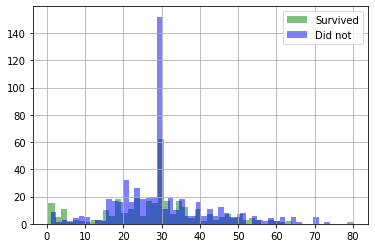

In [59]:
survivors = titanic['Survived'] == 1
titanic[survivors]['Age'].hist(alpha = 0.5, color= 'g', bins = 50)
titanic[~survivors]['Age'].hist(alpha = 0.5, color= 'b', bins = 50)

# prettify
plt.legend(('Survived', 'Did not'),loc='best') 
plt.plot()

From Categorical to Numerical Values

In [60]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.0,1,0,113803,53.1000,S,1
4,5,3,male,35.0,0,0,373450,8.0500,S,0


In [61]:
titanic.Sex.values[0:10]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female'], dtype=object)

In [63]:
pd.Categorical(titanic.Sex).codes[0:10] # where male == 1, and female == 0

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int8)

In [64]:
titanic.Sex = pd.Categorical(titanic.Sex).codes

In [65]:
# should we do something about ticket?
titanic.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [66]:
# we do not really need it
titanic.drop('Ticket', axis=1, inplace=True)

In [67]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


In [68]:
# how about Embarked?
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Dummy Variables

In [69]:
titanic  = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,1,0,0
2,3,3,0,26.0,0,0,7.9250,1,0,0,1
3,4,1,0,35.0,1,0,53.1000,1,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,0,1


🤯 👍

### What else should we do here?